Current phase befor execution: m= 1 ----------------------------------
Current phase befor execution: m= 2 ----------------------------------
Current phase befor execution: m= 3 ----------------------------------
Current phase befor execution: m= 4 ----------------------------------
Current phase befor execution: m= 5 ----------------------------------
Current phase befor execution: m= 6 ----------------------------------
Current phase befor execution: m= 7 ----------------------------------
Unconsumed budget: 444
print(cubes_with_empirical_mean) [{'lower': array([0.]), 'upper': array([0.0078125]), 'depth': 7, 'empirical_mean': 2.459498260021234, 'extra_empirical_mean': 2.4583665179201866, 'new_pulls': 222}, {'lower': array([0.0078125]), 'upper': array([0.015625]), 'depth': 7, 'empirical_mean': 2.4537011767143655, 'extra_empirical_mean': 2.4816382968279314, 'new_pulls': 222}]
Final unconsummed budget: 0


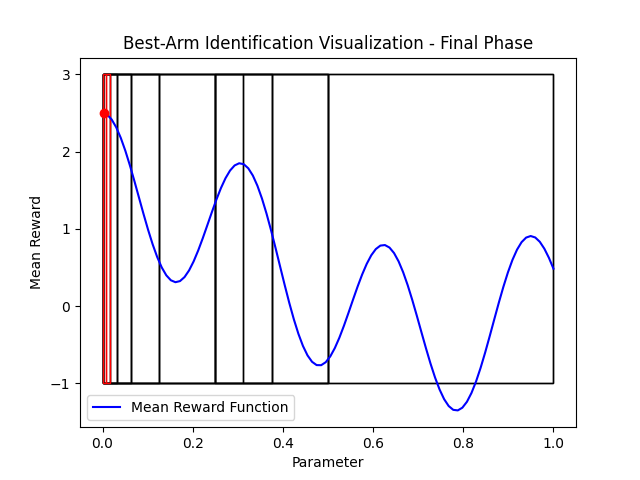

In [11]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from zooming import BanditInstance


np.random.seed(0)


def simulate_pulls(bandit, new_pulls = 0):
    #Generates the samples for the current phase
    current_phase = bandit.get_phase_state()["m"]
    cubes_with_empirical_mean= []
    current_active_cubes = bandit.cube_discretizer.get_cubes_by_depth(current_phase)
    for cube in current_active_cubes:
        lower, upper = cube["lower"], cube["upper"]
        arm = (lower + upper) / 2
        
        #Simulate pulls from a Guassian bandit with sigma=1/4
        sigma=1/4
        if new_pulls > 0:
            cube["extra_empirical_mean"] = np.mean(np.random.normal(mean_reward_function(arm), sigma, new_pulls))
            cube["new_pulls"] = new_pulls
            cubes_with_empirical_mean.append(cube)
        if new_pulls == 0:
            cube["empirical_mean"] = np.mean(np.random.normal(mean_reward_function(arm), sigma, np.round(bandit.get_phase_state()["n_m"]).astype(int)))
            cubes_with_empirical_mean.append(cube)
        
    return cubes_with_empirical_mean
    


    

#Define a test mean reward function
mean_reward_function = lambda x: np.cos(4*x)-np.cos(x)/2 +np.cos(20*x)+1

bandit = BanditInstance(L=1, param_dim=1, beta=1, delta=0, max_pulls=1000)

# Iterate phases until bandit.converged == True
while not bandit.converged :
    #print(f"Empirical mean for phase {bandit.m} is: {empirical_mean}")
    bandit.execute_phase(simulate_pulls(bandit))


#Use the unconsummed budget uniformly
unconsummed_budget = bandit.max_pulls-bandit.consumed_budget
current_phase = bandit.get_phase_state()["m"]
cubes_with_empirical_mean= []
current_active_cubes = bandit.cube_discretizer.get_cubes_by_depth(current_phase)

new_pulls = np.floor( unconsummed_budget / len(current_active_cubes) ).astype(int)
bandit.use_uncomsumed_budget(simulate_pulls(bandit, new_pulls))




# Plot mean_reward_function
x = np.linspace(0, 1, 100)
y = mean_reward_function(x)

max_depth = max(cube["depth"] for cube in bandit.get_phase_state()["current_cubes"])
        
plt.figure()
plt.plot(x,y, color="blue", label='Mean Reward Function')
plt.plot(bandit.optimal, mean_reward_function(bandit.optimal), 'ro')


for cube in bandit.get_phase_state()["current_cubes"]:
    lower, upper = cube["lower"], cube["upper"]
    depth = cube["depth"]
    
            # Plot the cube based on its dimension and depth
    if bandit.param_dim == 1:
                # In 1D, we plot as lines
                color = 'red' if depth == max_depth else 'black'
                #plt.plot([lower[0], upper[0]], [0, 0], color=color, lw=2)
                plt.gca().add_patch(plt.Rectangle((lower[0], -1), upper[0] - lower[0], 4, edgecolor=color, facecolor='none'))
                plt.title('Best-Arm Identification Visualization - Final Phase')
                plt.xlabel('Parameter')
                plt.ylabel('Mean Reward')
                
        
#plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

Current phase befor execution: m= 1 ----------------------------------
Current phase befor execution: m= 2 ----------------------------------
Current phase befor execution: m= 3 ----------------------------------
Current phase befor execution: m= 4 ----------------------------------
Unconsumed budget: 224
print(cubes_with_empirical_mean) [{'lower': array([0.375, 0.375]), 'upper': array([0.4375, 0.4375]), 'depth': 4, 'empirical_mean': 0.7403474305749023, 'extra_empirical_mean': 0.8846619693955522, 'new_pulls': 11}, {'lower': array([0.375 , 0.4375]), 'upper': array([0.4375, 0.5   ]), 'depth': 4, 'empirical_mean': 1.018805741503591, 'extra_empirical_mean': 0.8537999759632039, 'new_pulls': 11}, {'lower': array([0.4375, 0.375 ]), 'upper': array([0.5   , 0.4375]), 'depth': 4, 'empirical_mean': 0.9544854093028723, 'extra_empirical_mean': 0.925568449019896, 'new_pulls': 11}, {'lower': array([0.4375, 0.4375]), 'upper': array([0.5, 0.5]), 'depth': 4, 'empirical_mean': 0.9550194268971671, 'extra_

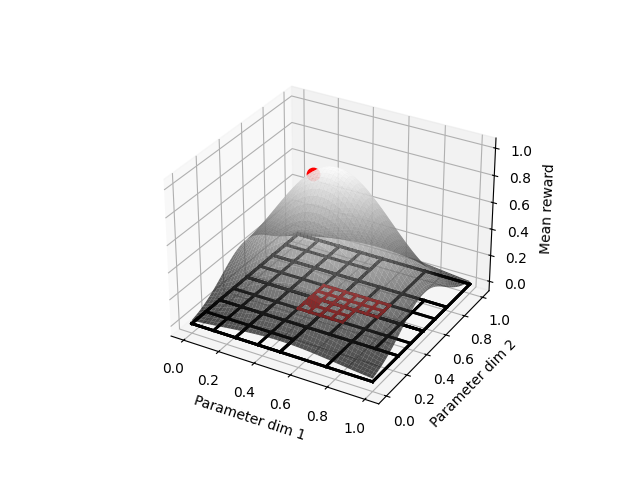

In [9]:
np.random.seed(0)
#Define a test mean reward function
mean_reward_function = lambda eps:  np.exp(-(eps[0]-0.5)**2 *5) * np.exp(-(eps[1]-0.5)**2*10)

bandit = BanditInstance(L=0.1, param_dim=2, beta=1, delta=0, max_pulls=1000)

# Iterate phases until bandit.converged == True
while not bandit.converged:
    #print(f"Empirical mean for phase {bandit.m} is: {empirical_mean}")
    bandit.execute_phase(simulate_pulls(bandit))


#Use the unconsummed budget uniformly
unconsummed_budget = bandit.max_pulls-bandit.consumed_budget
current_phase = bandit.get_phase_state()["m"]
cubes_with_empirical_mean= []
current_active_cubes = bandit.cube_discretizer.get_cubes_by_depth(current_phase)

new_pulls = np.floor( unconsummed_budget / len(current_active_cubes) ).astype(int)
bandit.use_uncomsumed_budget(simulate_pulls(bandit, new_pulls))




# Plot mean_reward_function
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)
Z = mean_reward_function([X, Y])

max_depth = max(cube["depth"] for cube in bandit.get_phase_state()["current_cubes"])
        
 # Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
# Plot the surface
ax.plot_surface(X, Y, Z, cmap='grey', edgecolor='none', alpha=0.7)
ax.set_xlabel('Parameter dim 1')
ax.set_ylabel('Parameter dim 2')
ax.set_zlabel('Mean reward')
#ax.set_title('3D Surface Plot of the mean Reward Function')

ax.scatter(bandit.optimal[0], bandit.optimal[1], mean_reward_function(bandit.optimal), color='red', s=80)
ax.scatter(bandit.optimal[0], bandit.optimal[1], 0, color='red', s=80)


for cube in bandit.get_phase_state()["current_cubes"]:
    lower, upper = cube["lower"], cube["upper"]
    depth = cube["depth"]
    
            # Plot the cube based on its dimension and depth
    if bandit.param_dim == 1:
                # In 1D, we plot as lines
                color = 'red' if depth == max_depth else 'black'
                #plt.plot([lower[0], upper[0]], [0, 0], color=color, lw=2)
                plt.gca().add_patch(plt.Rectangle((lower[0], -1), upper[0] - lower[0], 4, edgecolor=color, facecolor='none'))
                plt.title('Best-Arm Identification Visualization - Final Phase')
                plt.xlabel('Parameter')
                plt.ylabel('Mean Reward')
                
    elif bandit.param_dim == 2:
                color = 'red' if depth == max_depth else 'black'
                # In 2D, plot only the edges of the rectangle
                plt.plot([lower[0], lower[0]], [lower[1], upper[1]], color=color, lw=2)  # Left edge
                plt.plot([upper[0], upper[0]], [lower[1], upper[1]], color=color, lw=2)  # Right edge
                plt.plot([lower[0], upper[0]], [lower[1], lower[1]], color=color, lw=2)  # Bottom edge
                plt.plot([lower[0], upper[0]], [upper[1], upper[1]], color=color, lw=2)  # Top edge
        
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()